# Project: TMDB Movies Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Iam going to work with TMBd data set This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including some features like budget ,revenue and runtime.

>For questions and insights that we can explore through investigation.
 1. Movies with highest and lowest RunTime?
 2. Movies with highest and lowest Budget?
 3. Movies with highest and lowest Revenue?
 4. What are the averages of these features?
 5. Relations between these features?
 6. Most successfull genres?
 7. Cast with highest Frequencies?


In [2]:
#Packages needed for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>Here, I'll start gathering some informations about the data, before starting the cleanning process.

### General Properties

In [3]:
#Loading data & printing first 5 lines
df=pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#statistics of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#general info about the data like columns datatypes & missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Cleaning requierd after going through data
1. errant data needs to be deleted such as ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview','release_date', 'production_companies', 'vote_count', 'vote_average'].
2. duplicates removal.
3. converting some datatypes for features such as budget&revenue.
4. replacing un-recorded data with value of "0" to "NAN" so we can drop it to avoid being missleaded. 
### Data Cleaning (Starting the steps above)

>first, columns removal

In [6]:
#columns to be deleted
df.drop(['id', 'imdb_id', 'popularity','release_date', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count', 'vote_average'], axis=1,inplace=True)
#cheacking
df.head(3)

,budget,revenue,original_title,cast,runtime,genres,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015


> checking for duplicates then deleting them

In [7]:
#checking for duplicates then deleting them
df.duplicated().sum()
#delete
df.drop_duplicates(inplace=True)
#checking
df.shape

(10865, 7)

> taking care of un-recorded data
> "0" to "NAN"

In [10]:
#convert "0" to "NAN" in both budget & revenue & runtime
df['budget']=df['budget'].replace(0,np.NAN)
df['revenue']=df['revenue'].replace(0,np.NAN)
df['runtime']=df['runtime'].replace(0,np.NAN)
#drop NAN values
df.dropna(inplace=True)
#check
df.shape

(3850, 7)

> DataType Converting

In [16]:
#convert datatype of budget and revenue to int
df['budget']=df['budget'].astype(np.int64)
df['revenue']=df['revenue'].astype(np.int64)
#check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_year      10865 non-null int64
dtypes: int64(4), object(3)
memory usage: 679.1+ KB


> function to check for unique values for each column

In [20]:
def uniquevalues (ColumnName):
    return df[ColumnName].nunique()
display(uniquevalues('budget'))
display(uniquevalues('revenue'))
display(uniquevalues('runtime'))

557

4702

247

<a id='eda'></a>
## Exploratory Data Analysis

> Our goal here is to address the questions above and create visualizations

### Research Question 1 (Movies with highest and lowest RunTime!)

In [21]:
#max runtime
df[df['runtime']==df['runtime'].max()]

,budget,revenue,original_title,cast,runtime,genres,release_year
3894,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,900,Documentary,2011


In [22]:
#min runtime
df[df['runtime']==df['runtime'].min()]

,budget,revenue,original_title,cast,runtime,genres,release_year
92,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,0,Fantasy|Action|Adventure,2015
334,0,0,Ronaldo,Cristiano Ronaldo,0,Documentary,2015
410,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,0,Horror,2015
445,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,0,Horror,2015
486,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,0,TV Movie|Drama,2015
595,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,0,Horror,2015
616,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,0,Drama|Comedy,2015
1241,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,0,Romance|Music|Comedy,2014
1289,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,0,Thriller|Horror|Mystery,2014
1293,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,0,Documentary|Drama|Music,2014


> Carlos with highest runtime of 338 minutes,Kid's Story with lowest runtime of 15 minutes.


### Research Question 2  (Movies with highest and lowest Budget!)

In [23]:
#max Budget
df[df['budget']==df['budget'].max()]

,budget,revenue,original_title,cast,runtime,genres,release_year
2244,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,100,Adventure|Fantasy|Action|Western|Thriller,2010


In [24]:
#min Budget
df[df['budget']==df['budget'].min()]

,budget,revenue,original_title,cast,runtime,genres,release_year
30,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,103,Mystery|Drama,2015
36,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,101,Crime|Drama|Mystery,2015
72,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,95,Thriller,2015
74,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,108,Action|Adventure|Fantasy,2015
75,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,105,Comedy|Drama,2015
88,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,101,Drama|Romance|Science Fiction,2015
92,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,0,Fantasy|Action|Adventure,2015
95,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,92,Adventure|Animation|Comedy|Family,2015
100,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,8,Adventure|Animation|Family,2015
101,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,119,Action|Drama|Science Fiction,2015


> The Warrior's Way with highest budget of 425000000 dollars Lost & Found with lowest budget of 1 dollars.

### Research Question 3 (Movies with highest and lowest Revenue!)

In [25]:
#max revenue
df[df['revenue']==df['revenue'].max()]

,budget,revenue,original_title,cast,runtime,genres,release_year
1386,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,162,Action|Adventure|Fantasy|Science Fiction,2009


In [26]:
#min revenue
df[df['revenue']==df['revenue'].min()]

,budget,revenue,original_title,cast,runtime,genres,release_year
48,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,92,Thriller|Crime|Drama,2015
67,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,96,Crime|Thriller|Action,2015
74,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,108,Action|Adventure|Fantasy,2015
75,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,105,Comedy|Drama,2015
92,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,0,Fantasy|Action|Adventure,2015
93,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,96,Thriller|Science Fiction|Action|Adventure,2015
100,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,8,Adventure|Animation|Family,2015
101,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,119,Action|Drama|Science Fiction,2015
103,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,104,Thriller|Action,2015
116,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,105,Action|Fantasy|Adventure,2015


> Avatar has greatest revenue of 2781505847 Dollars , Shattered Glass & Mallrats have lowest revenue with 2 dollars


### Research Question 4 (What are the averages of these features!)

> runtime avg & visualization

In [27]:
#average runtime
df['runtime'].mean()

102.07179015186378

(array([  1.63000000e+02,   6.80000000e+01,   4.00000000e+01,
          4.70000000e+01,   1.92000000e+02,   1.90500000e+03,
          4.40600000e+03,   2.32400000e+03,   1.02100000e+03,
          3.37000000e+02,   1.35000000e+02,   8.20000000e+01,
          6.30000000e+01,   1.80000000e+01,   8.00000000e+00,
          8.00000000e+00,   1.50000000e+01,   1.00000000e+00,
          5.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

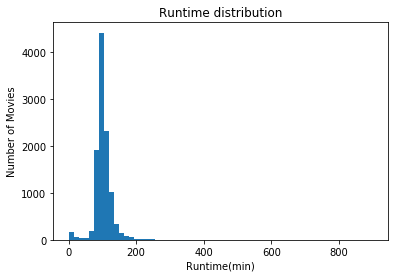

In [28]:
#visualize runtime distribution
# x-axis
plt.xlabel('Runtime(min)')
# y-axis
plt.ylabel('Number of Movies')
# Title
plt.title('Runtime distribution')
# Plotting a histogram
plt.hist(df['runtime'], bins = 60)


> budget & revenue averages

In [29]:
#budget avg
df['budget'].mean()

14624286.06433502

In [30]:
df['revenue'].mean()

39826896.076852277

* runtime avg = 109.2 min

* budget avg = 37240270.7 Dollars

* revenue avg = 107789664.9 Dollars

### Research Question 5 (Relations between these features!)

> runtime vs revenue

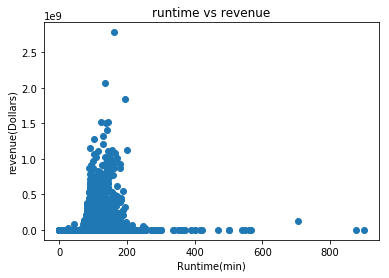

In [31]:
# x-axis
plt.xlabel('Runtime(min)')
# y-axis
plt.ylabel('revenue(Dollars)')
# Title
plt.title('runtime vs revenue')
plt.scatter(df['runtime'], df['revenue'], alpha=1)
plt.show()

> runtime vs budget

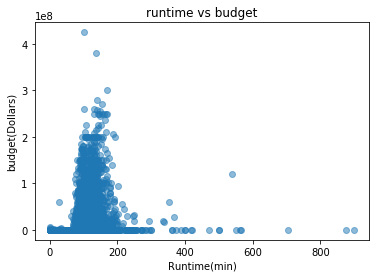

In [32]:
# x-axis
plt.xlabel('Runtime(min)')
# y-axis
plt.ylabel('budget(Dollars)')
# Title
plt.title('runtime vs budget')
plt.scatter(df['runtime'], df['budget'], alpha=0.5)
plt.show()

> we can see most of movies has like 85>120 average runtime

> budget vs revenue

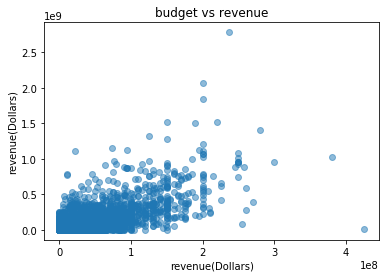

In [33]:
# x-axis
plt.xlabel('revenue(Dollars)')
# y-axis
plt.ylabel('revenue(Dollars)')
# Title
plt.title('budget vs revenue')
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.show()

### Research Question 6 (Most successfull genres!)

> Top Genres for movies with Net profit >=20M Dollars

> Profit=Revenue-Budget

In [34]:
#Profit=Revenue-Budget
df['profit'] = df['revenue'] - df['budget']

In [35]:
# Dataframe which have movies with more or equal than 20M profit
df_top = df[df['profit'] >= 20000000]
# Reindexing the dataframe
df_top.index = range(len(df_top))
#check
df_top.head()

,budget,revenue,original_title,cast,runtime,genres,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015,1316249360


In [36]:
#counting number of occurences for each genre
TOP_GENRES = pd.Series(df_top['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
TOP_GENRES

Drama              895
Comedy             852
Action             657
Thriller           641
Adventure          509
Romance            383
Crime              353
Family             316
Science Fiction    285
Fantasy            265
Horror             227
Mystery            179
Animation          148
Music               74
History             69
War                 66
Western             22
Documentary         12
Foreign              4
TV Movie             1
dtype: int64

> Visualize Top Genres

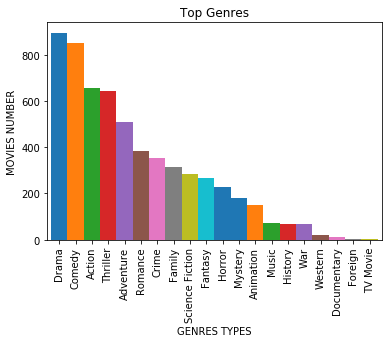

In [37]:
diagram = TOP_GENRES.plot.bar(fontsize = 10,width=1)
#title
diagram.set(title = 'Top Genres')
# x-label & y-label
diagram.set_xlabel('GENRES TYPES')
diagram.set_ylabel('MOVIES NUMBER')
plt.show()

> Top 10 genres for movies with netprofit over 20M are:

1. Drama
2. Comedy
3. Action
4. Thriller
5. Adventure
6. Romance
7. Crime
8. Family
9. Science Fiction
10. Fantasy

### Research Question 7 (Cast with highest Frequencies!)

> Top CAST for movies with Net profit >=20M Dollars

In [38]:
#counting most frequent cast involved in movies with Net profit >=20M Dollars
TOP_CAST = pd.Series(df_top['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
TOP_CAST

Tom Hanks                 31
Brad Pitt                 30
Tom Cruise                30
Robin Williams            29
Robert De Niro            28
Bruce Willis              26
Sylvester Stallone        25
Cameron Diaz              25
Eddie Murphy              25
Samuel L. Jackson         25
Johnny Depp               24
Mark Wahlberg             23
Nicolas Cage              23
Mel Gibson                22
Denzel Washington         22
Morgan Freeman            21
Liam Neeson               21
Matt Damon                21
Adam Sandler              21
George Clooney            21
Harrison Ford             21
John Travolta             20
Jim Carrey                20
Michael Douglas           20
Clint Eastwood            20
Julia Roberts             20
Anthony Hopkins           19
Owen Wilson               19
Scarlett Johansson        19
Meryl Streep              19
                          ..
Nora-Jane Noone            1
Richmond Arquette          1
Elizabeth Mkandawie        1
Danny Trejo   

> visualize TOP(20) CAST members

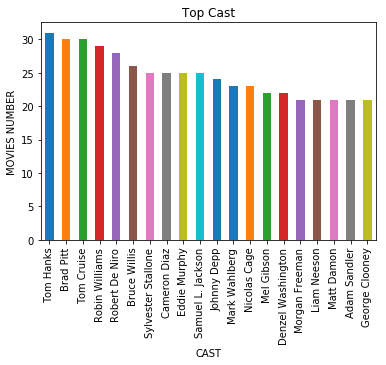

In [39]:
diagram = TOP_CAST.head(20).plot.bar(fontsize = 10,width=0.5)
#title
diagram.set(title = 'Top Cast')
# x-label & y-label
diagram.set_xlabel('CAST')
diagram.set_ylabel('MOVIES NUMBER')
plt.show()

* Top CAST members for movies with Net profit >=20M Dollars:
 1. Tom Cruise
 2. Brad Pitt
 3. Tom Hanks
 4. Robert De Niro
 5. Bruce Willis
 6. Samuel L. Jackson
 7. Cameron Diaz
 8. Johnny Depp
 9. Sylvester Stallone
 10. Eddie Murphy

<a id='conclusions'></a>
## Conclusions
* Carlos with highest runtime of 338 minutes,Kid's Story with lowest runtime of 15 minutes.

* The Warrior's Way with highest budget of 425000000 dollars Lost & Found with lowest budget of 1 dollars.

* runtime avg = 109.2 min

* budget avg = 37240270.7 Dollars

* revenue avg = 107789664.9 Dollars

* Top 10 genres for movies with netprofit over 20M are:
 1. Drama
 2. Comedy
 3. Action
 4. Thriller
 5. Adventure
 6. Romance
 7. Crime
 8. Family
 9. Science Fiction
 10. Fantasy
 
* Top CAST members for movies with Net profit >=20M Dollars:
 1. Tom Cruise
 2. Brad Pitt
 3. Tom Hanks
 4. Robert De Niro
 5. Bruce Willis
 6. Samuel L. Jackson
 7. Cameron Diaz
 8. Johnny Depp
 9. Sylvester Stallone
 10. Eddie Murphy
## Limitations
1. there was a lot of unrecorded data of Runtime,budget and revenue, i had to discard it to not misslead the conclutions  
2. Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.
3. There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0